In [3]:
# Import library
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output, display
import os
import imutils
from sklearn.utils import shuffle
import time
import PIL
from PIL import Image as IMG
from random import randrange as rand

In [4]:
imgSize = 227
Men = []
for filename in os.listdir('..\\Dataset\\Men'):
	# load image
	img_data = cv2.imread('..\\Dataset\\Men\\' + filename)
	# Resize Image to 227:
	h, w = img_data.shape[0], img_data.shape[1]
	if h < w:
    		img_data = cv2.resize(img_data, (imgSize, int(imgSize+50/(h/w))))
	else: 
		img_data = cv2.resize(img_data, (imgSize, int(imgSize+50/(w/h))))	
	# Crop Image to 227x227x3:
	# Generate 4 sample from original image:
	for i in range(4):
		xR, yR = rand(30), rand(20)
		img_data = imutils.rotate_bound(img_data,rand(-10,10))
		img_data = img_data[yR:yR+imgSize, xR:xR+imgSize]
		img_data = cv2.resize(img_data, (imgSize, imgSize))
		# store loaded image
		print(img_data.shape)
		Men.append([img_data, 1])
		clear_output(wait=True)
		print('> loaded', i+1,' - %s - %s' % (filename, img_data.shape), '- label: 1')
		cv2.imshow('image', img_data)
		cv2.waitKey(1)
		cv2.destroyAllWindows()
print('>> Done',np.array(Men).shape)

> loaded 4  - image_99.jpg - (227, 227, 3) - label: 1
>> Done (800, 2)


C:\Users\Admin\AppData\Local\Temp/ipykernel_9964/1125843223.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print('>> Done',np.array(Men).shape)


In [19]:
woMen = []
for filename in os.listdir('..\\Dataset\\Women'):
	# load image
	img_data = cv2.imread('..\\Dataset\\Women\\' + filename)
	# Resize Image to 227:
	h, w = img_data.shape[0], img_data.shape[1]
	if h < w:
    		img_data = cv2.resize(img_data, (imgSize, int(imgSize+50/(h/w))))
	else: 
		img_data = cv2.resize(img_data, (imgSize, int(imgSize+50/(w/h))))	
	# Crop Image to 227x227x3:
	# Generate 4 sample from original image:
	for i in range(4):
		xR, yR = rand(30), rand(20)
		img_data = imutils.rotate_bound(img_data,rand(-10,10))
		img_data = img_data[yR:yR+imgSize, xR:xR+imgSize]
		img_data = cv2.resize(img_data, (imgSize, imgSize))
		# store loaded image
		print(img_data.shape)
		woMen.append([img_data, 0])
		clear_output(wait=True)
		print('> loaded', i+1,' - %s - %s' % (filename, img_data.shape), '- label: 0')
		cv2.imshow('image', img_data)
		cv2.waitKey(1)
		cv2.destroyAllWindows()
print('>> Done',np.array(woMen).shape)

> loaded 4  - image_99.jpg - (227, 227, 3) - label: 0
>> Done (800, 2)


C:\Users\Admin\AppData\Local\Temp/ipykernel_9964/1807697038.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print('>> Done',np.array(woMen).shape)


In [20]:

# Add 2 subdata to train_data
train_data = [x for x in Men[:int(len(Men)*0.9)]]
for x in woMen[:int(len(woMen)*0.9)]:
    train_data.append(x)
#train_data = np.array(train_data)
# Add 2 subdata to test_data
test = [x for x in Men[int(len(Men)*0.9):]]
for x in woMen[int(len(Men)*0.9):]:
    test.append(x)
#test = np.array(test)
# Shuffle data:
train_data = shuffle(train_data)
test = shuffle(test)
print('Train data size:', len(train_data))#, '\n', [x['label'] for x in train_data])
print('Test data size:', len(test))
#print(train_data)
#print(test)
# Load data to X & Y
train = []
X = []
Y = []
X_ = []
Y_ = []

for feature_, label_ in test:
    X_.append(feature_)
    Y_.append(label_)

for feature, label in train_data:
    X.append(feature)
    Y.append(label)
#print(Y, '\n', Y_)
# Normalize the data:
#train = np.array(train_data)
X = np.array(X)#.reshape(-1, imgSize, imgSize, 1)
X_ = np.array(X_)#.reshape(-1, imgSize, imgSize, 1)

print(X.shape)
print(X.size)
print(len(X))





Y = np.array(Y)
Y_ = np.array(Y_)

Train data size: 1440
Test data size: 160
(1440, 227, 227, 3)
222605280
1440


(1440, 227, 227, 3)


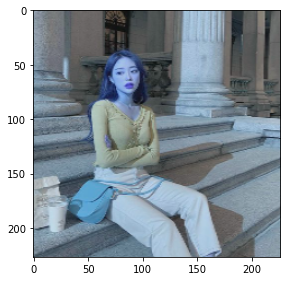

In [46]:
import random
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X[random.randint(0,99)])
print(X.shape)

In [47]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
model.fit(X,
          Y,
          epochs=500,
          validation_data=(X_,Y_))

In [11]:
model.save('gender_classification.h5')

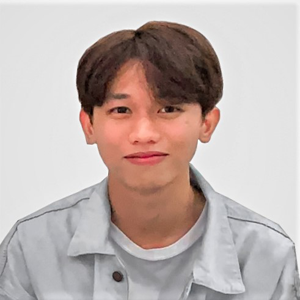

Hình bạn nhập vào là: Con trai


In [22]:
def Predict(link):
    # load image
	imgSize = 227
	img_data = cv2.imread('..\\Test\\'+link+'.jpg')
	show = IMG.open('..\\Test\\'+link+'.jpg')
	show = show.resize((300, int(300//(show.size[0]/show.size[1]))))
	# Resize Image to 227:
	h, w = img_data.shape[0], img_data.shape[1]
	img_data = cv2.resize(img_data, (imgSize, int(imgSize/(w/h))))
	# Crop Image to 227x227x3:
	#img_data = img_data.crop((0, (h-227)/2, 227, (h-227)/2+227))
	img_data = img_data[0:227, 0:227]
	img_data = cv2.resize(img_data, (imgSize, imgSize))
	# store loaded image
	pred = [img_data]
	pred = np.array(pred)
	# load model:
	model_ = keras.models.load_model('gender_classification.h5')
	A = model_.predict(pred)
	if A[0][1] > A[0][0]:
		clear_output(wait=True)
		display(show)
		return 'Con trai'
	clear_output(wait=True)
	display(show)
	return 'Con gái'

print('Hình bạn nhập vào là:', Predict(str(input('Nhập tên ảnh:'))))